<a href="https://colab.research.google.com/github/VarelAntoni/machine_learning_project/blob/main/brain-tumor-prediction/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)
import io
from google.colab import drive
from google.colab import files

loading data

In [ ]:
def load_images(directory):
  images = []
  for filename in os.listdir(directory):
    img = Image.open(os.path.join(directory, filename))
    img = img.resize((224, 224))
    img = img.convert('RGB')
    img = np.array(img) / 255.0
    images.append(img)
  return images

In [ ]:
tumor_images = load_images('/content/drive/My Drive/Datasets/brain_tumor_dataset/yes')
no_tumor_images = load_images('/content/drive/My Drive/Datasets/brain_tumor_dataset/no')

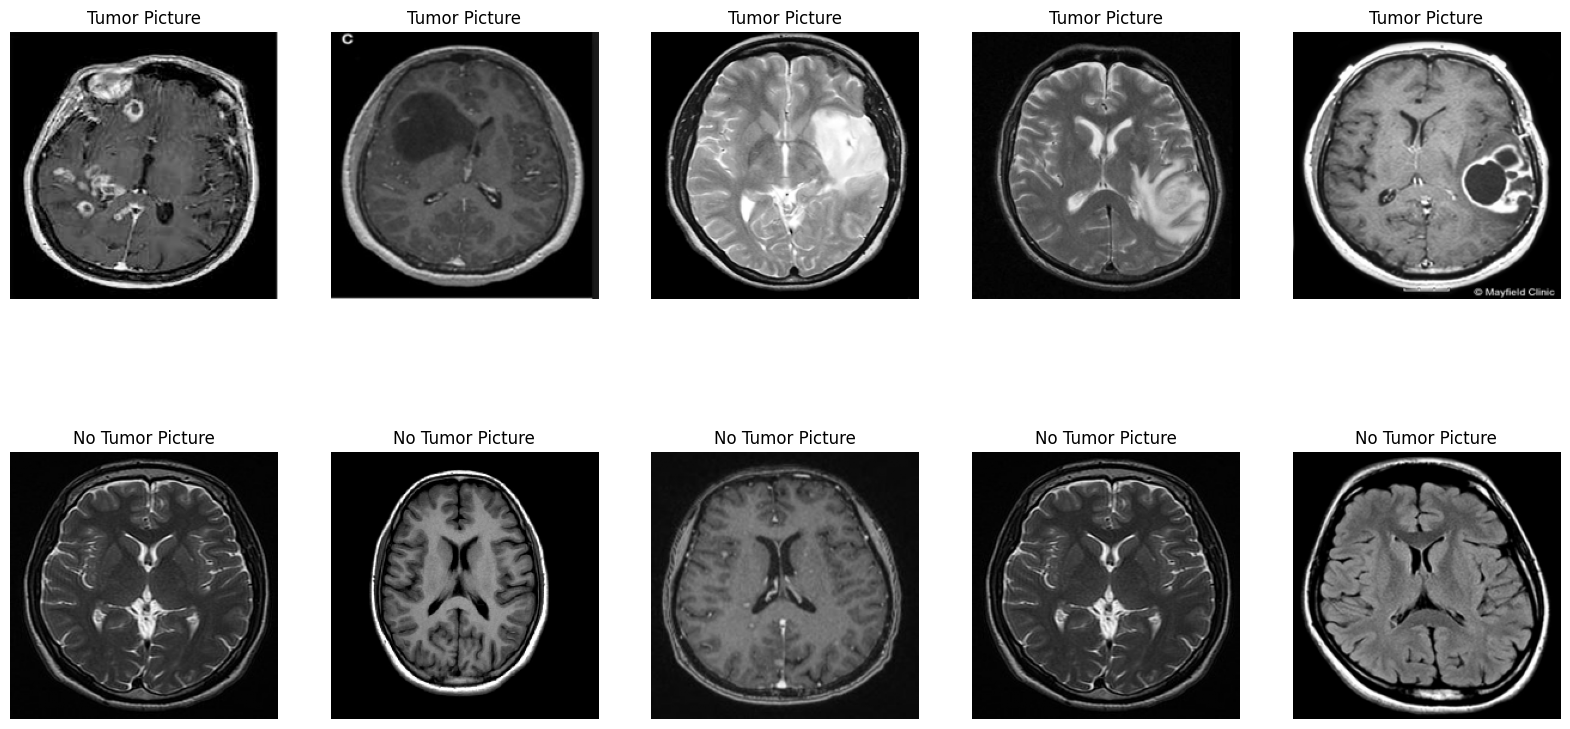

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i in range(5):
  axes[0, i].imshow(tumor_images[i])
  axes[0, i].set_title('Tumor Picture')
  axes[0, i].axis('off')

for i in range(5):
  axes[1, i].imshow(no_tumor_images[i])
  axes[1, i].set_title('No Tumor Picture')
  axes[1, i].axis('off')

plt.show()

In [ ]:
type(tumor_images)

list

In [ ]:
len(tumor_images)

155

In [ ]:
len(no_tumor_images)

98

In [ ]:
tumor_images

[array([[[0.05098039, 0.05098039, 0.05098039],
         [0.05098039, 0.05098039, 0.05098039],
         [0.04705882, 0.04705882, 0.04705882],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.10196078, 0.10196078, 0.10196078],
         [0.69411765, 0.69411765, 0.69411765]],
 
        [[0.02745098, 0.02745098, 0.02745098],
         [0.02745098, 0.02745098, 0.02745098],
         [0.02352941, 0.02352941, 0.02352941],
         ...,
         [0.        , 0.        , 0.        ],
         [0.09019608, 0.09019608, 0.09019608],
         [0.69411765, 0.69411765, 0.69411765]],
 
        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.08235294, 0.08235294, 0.08235294],
         [0.69411765, 0.69411765, 0.69411765]],
 
        ...,
 
        [[0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568

# Labelling

In [ ]:
def assign_labels(tumor_images, no_tumor_images):
  tumor_labels = np.ones(len(tumor_images))
  no_tumor_labels = np.zeros(len(no_tumor_images))
  return tumor_labels, no_tumor_labels

tumor_labels, no_tumor_labels = assign_labels(tumor_images, no_tumor_images)

In [ ]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [ ]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
type(tumor_labels)

numpy.ndarray

In [ ]:
data = tumor_images + no_tumor_images
labels = np.concatenate((tumor_labels, no_tumor_labels), axis = 0)

In [ ]:
data

[array([[[0.05098039, 0.05098039, 0.05098039],
         [0.05098039, 0.05098039, 0.05098039],
         [0.04705882, 0.04705882, 0.04705882],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.10196078, 0.10196078, 0.10196078],
         [0.69411765, 0.69411765, 0.69411765]],
 
        [[0.02745098, 0.02745098, 0.02745098],
         [0.02745098, 0.02745098, 0.02745098],
         [0.02352941, 0.02352941, 0.02352941],
         ...,
         [0.        , 0.        , 0.        ],
         [0.09019608, 0.09019608, 0.09019608],
         [0.69411765, 0.69411765, 0.69411765]],
 
        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.08235294, 0.08235294, 0.08235294],
         [0.69411765, 0.69411765, 0.69411765]],
 
        ...,
 
        [[0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568

In [ ]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
data[0].shape

(224, 224, 3)

# Splitting Data

In [ ]:
X = np.array(data)
y = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

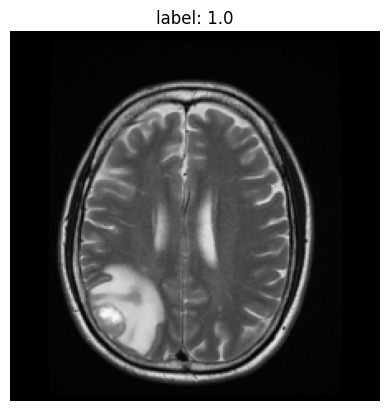

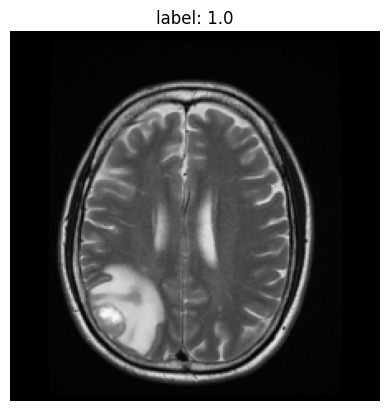

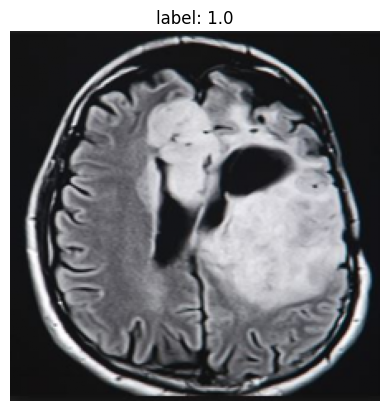

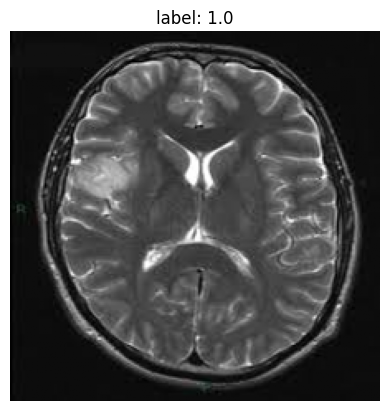

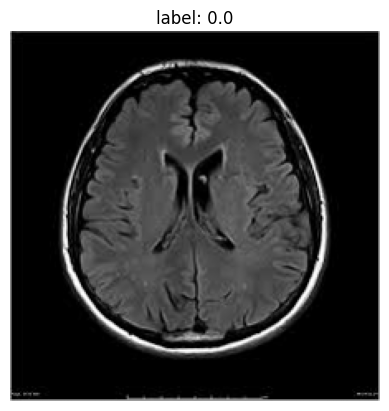

In [ ]:
for image, label in train.take(5):
  plt.figure()
  plt.imshow(image.numpy())
  plt.title('label: {}'.format(label.numpy()))
  plt.axis('off')
  plt.show()

In [ ]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [ ]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)

# Train Data

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation= 'relu', input_shape = (224, 224, 3), padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 401408)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │     102,760,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,761,857 (392.01 MB)

 Trainable params: 102,761,857 (392.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train, validation_data = val, epochs = 10, verbose=1)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.5800 - loss: 10.1296 - val_accuracy: 0.8500 - val_loss: 0.3752
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.7881 - loss: 2.0867 - val_accuracy: 0.6000 - val_loss: 1.9311
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7321 - loss: 1.7806 - val_accuracy: 0.9500 - val_loss: 0.2009
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.8383 - loss: 0.4066 - val_accuracy: 0.9000 - val_loss: 0.3108
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.8497 - loss: 0.3800 - val_accuracy: 0.9500 - val_loss: 0.1053
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.9085 - loss: 0.2179 - val_accuracy: 1.0000 - val_loss: 0.0698
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9867 - loss: 0.1068 - val_accuracy: 1.0000 - val_loss: 0.0346
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.9817 - loss: 0.0767 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 9

In [ ]:
evaluation = model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 362ms/step - accuracy: 0.8068 - loss: 1.0220


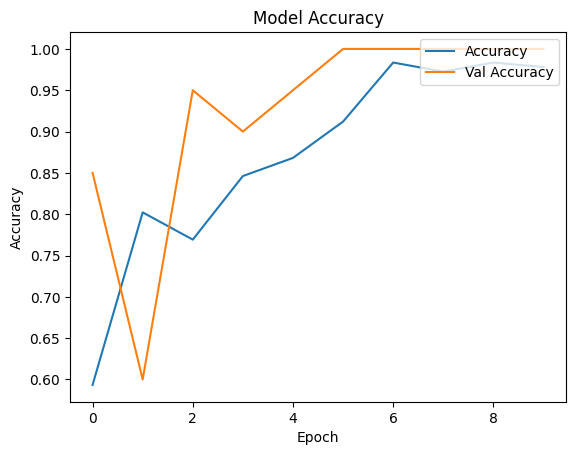

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Text(0.5, 0, 'Epoch')

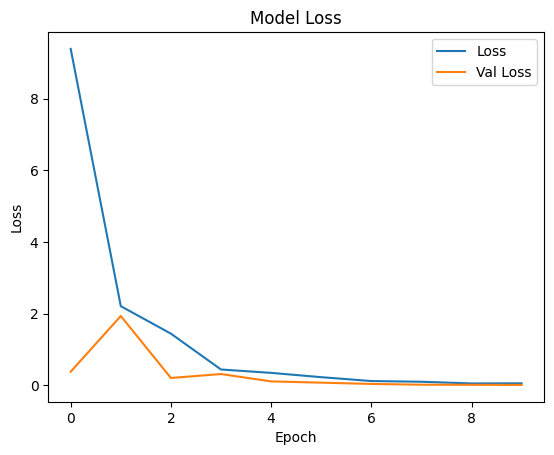

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'], loc = 'upper right')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
model.save("/content/drive/My Drive/Datasets/brain_tumor_dataset/brain_tumor.h5")

# Testing

In [ ]:
def load_uploaded_image(img_bytes):
  img = Image.open(io.BytesIO(img_bytes))
  img = img.resize((224, 224))
  img_array = np.array(img)
  img_array = img_array / 255.0
  return img_array

def predict_image(img_bytes):
  img_array = load_uploaded_image(img_bytes)
  img_array = np.expand_dims(img_array, axis = 0)
  prediction = model.predict(img_array)
  if prediction[0][0] > 0.5:
    return 'Tumor Detected'
  else:
    return 'No Tumor Detected'

Saving Y11.jpg to Y11.jpg


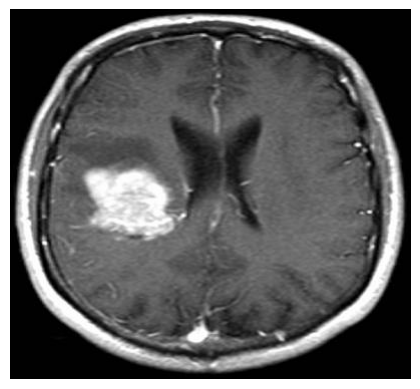

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Tumor Detected


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)
